In [1]:
import torch

In [2]:
vocab = {
    "closer" : 0,
    "every" : 1,
    "effort" : 2,
    "forward" : 3,
    "inches" : 4,
    "moves" : 5,
    "pizza" : 6,
    "toward" : 7,
    "you" : 8
}

inverse_vocab = {v: k for k,v in vocab.items()}

In [4]:
next_token_logits = torch.tensor([4.51, 0.89, -1.9,6.75, 1.63, -1.62, -1.89, 6.28, 1.79])

In [5]:
probas = torch.softmax(next_token_logits, dim=0)
next_token_id = torch.argmax(probas).item()
print(inverse_vocab[next_token_id])

forward


In [8]:
torch.manual_seed(123)
next_token_id = torch.multinomial(probas, num_samples=1).item()
print(inverse_vocab[next_token_id])

forward


In [9]:
probas

tensor([6.0907e-02, 1.6313e-03, 1.0019e-04, 5.7212e-01, 3.4190e-03, 1.3257e-04,
        1.0120e-04, 3.5758e-01, 4.0122e-03])

In [10]:
def print_sampled_tokens(probas):
    torch.manual_seed(123)
    sample = [torch.multinomial(probas, num_samples=1).item() for i in range(1_000)]
    sampled_ids= torch.bincount(torch.tensor(sample))
    for i, freq in enumerate(sampled_ids):
        print(f"{freq} x {inverse_vocab[i]}")

print_sampled_tokens(probas)

73 x closer
0 x every
0 x effort
582 x forward
2 x inches
0 x moves
0 x pizza
343 x toward


In [11]:
def softmax_with_temperature(logits, temperature):
    scaled_logits = logits / temperature
    return torch.softmax(scaled_logits, dim=0)

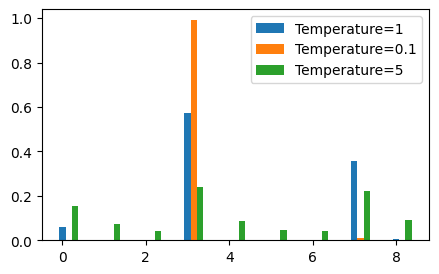

In [13]:
import matplotlib.pyplot as plt
temperatures = [1, 0.1, 5]
scaled_probas = [softmax_with_temperature(next_token_logits, T) for T in temperatures]

x =torch.arange(len(vocab))
bar_width = 0.15
fig, ax = plt.subplots(figsize=(5,3))
for i, T in enumerate(temperatures):
    rects = ax.bar(x+i *bar_width, scaled_probas[i], bar_width, label = f"Temperature={T}" )
ax.legend()
plt.show()